In [1]:
import numpy as np
import pandas as pd
import pickle
import torch.nn as nn
from torch.utils.data import DataLoader
import json, ast, sys, csv, random
import plotly.express as px
import math
import datetime
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt


#Implement training process
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, mean_absolute_error
csv.field_size_limit(sys.maxsize)
plt.rcParams.update({'font.size': 14})
URL = "/media/data/ccarmona/memoria/dataset/rl_csvs/"


def comma(num):
    num = str(num).replace(".",",")
    return num

def open_files_final(model_name):
    neo_df_final = pd.read_csv(URL + "neo_df_final"+ model_name +".csv", engine='python', encoding='utf-8')
    ql_df_final = pd.read_csv(URL + "ql_df_final"+ model_name +".csv", engine='python', encoding='utf-8')
    sarsa_df_final = pd.read_csv(URL + "sarsa_df_final"+ model_name +".csv", engine='python', encoding='utf-8')
    exsarsa_df_final = pd.read_csv(URL + "exsarsa_df_final"+ model_name +".csv", engine='python', encoding='utf-8')
    return [neo_df_final,ql_df_final, sarsa_df_final, exsarsa_df_final]
def open_files_iter(model_name):
    neo_df_iter = pd.read_csv(URL + "neo_df_iteration" + model_name +".csv", engine='python', encoding='utf-8')
    ql_df_iter = pd.read_csv(URL + "ql_df_iteration" + model_name +".csv", engine='python', encoding='utf-8')
    sarsa_df_iter = pd.read_csv(URL + "sarsa_df_iteration"+ model_name +".csv", engine='python', encoding='utf-8')
    exsarsa_df_iter = pd.read_csv(URL + "exsarsa_df_iteration"+ model_name +".csv", engine='python', encoding='utf-8')
    return [neo_df_iter,ql_df_iter, sarsa_df_iter, exsarsa_df_iter]

In [2]:
model_name = "Model_Adam0.75_"

In [3]:
model_final = open_files_final(model_name) 
model_final_iter= open_files_iter(model_name)  ## alpha 0.9, se recicla el tuneo de epsilon 

### Latencia promedio de cada algoritmo + promedio real y promedio por iteración

In [4]:
def Valores_Promedio(df):
    real_value = [np.mean(df[0]['real_new']) for i in range(len(df))]
    old_pred = [np.mean(df[0]['pred_old']) for i in range(len(df))]
    h = [
        np.mean(df[0]['pred_new']), # NEO
        np.mean(df[1]['pred_new']), # QL
        np.mean(df[2]['pred_new']), # SARSA
        np.mean(df[3]['pred_new']), # EXSARSA
    ]
    return h, real_value, old_pred
def autolabel(rects, ax, rotate):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.75*height,
                comma(round(float(height),2)),
                ha='center', va='bottom', rotation = rotate)

In [5]:
def PromedioPorIteracionFormato(df, num_iter):
    aux_dict = {}
    values_pred = []
    all_values_pred = []
    for i in range(num_iter):
        aux_dict[str(i)] = {"index" : 0, "preds" : [], "mean_preds" : []}
    for i in range(len(df)):
        a = [df['index'][i],df['iteration'][i],df['pred_new'][i]]
        aux_dict[str(a[1])]["index"] = a[0]
        aux_dict[str(a[1])]["preds"].append(float(a[2]))
    for k,v in aux_dict.items():
        aux_dict[k]["mean_preds"] = np.mean(aux_dict[k]["preds"])
        values_pred.append(np.mean(aux_dict[k]["preds"]))
        all_values_pred.append(aux_dict[k]["preds"])
    index_list = [int(x) for x in list(aux_dict.keys())]
    return index_list, values_pred, all_values_pred

In [6]:
index_list_neo, values_pred_neo, all_values_pred_neo = PromedioPorIteracionFormato(model_final_iter[0],200)
index_list_ql, values_pred_ql, all_values_pred_ql = PromedioPorIteracionFormato(model_final_iter[1],200)
index_list_sarsa, values_pred_sarsa, all_values_pred_sarsa = PromedioPorIteracionFormato(model_final_iter[2],200)
index_list_exsarsa, values_pred_exsarsa, all_values_pred_exsarsa = PromedioPorIteracionFormato(model_final_iter[3],200)

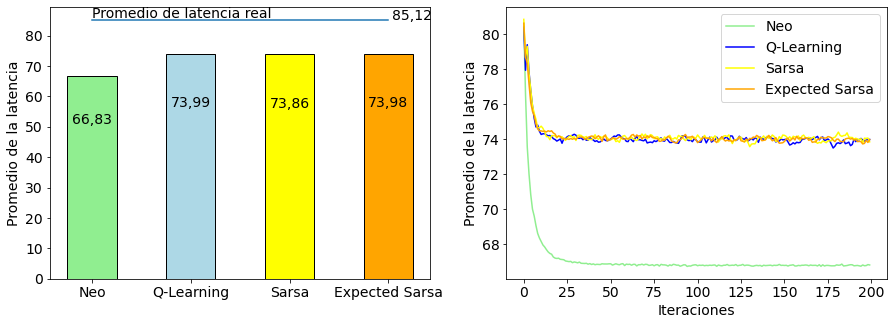

In [7]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))
width = 0.15
ind = np.arange(4)*width*2
c = ['lightgreen','lightblue','yellow','orange']
names = ('Neo','Q-Learning','Sarsa','Expected Sarsa')


h1, real_value1, old_pred1  = Valores_Promedio(model_final)
rects1 = ax1.bar(ind, h1, width, color=c, edgecolor = 'black',align='center')
line11 = ax1.plot(ind, real_value1);
#line22 = ax1.plot(ind, old_pred1);
ax1.text(ind[0],real_value1[0] + 0.55,'Promedio de latencia real')
#ax1.text(ind[0],old_pred1[0] + 0.55,'Promedio de latencia red neuronal')
ax1.text(ind[3]+0.01,real_value1[0] - 0.1,comma(round(real_value1[0],2)))
#ax1.text(ind[3]+0.01,old_pred1[0] - 0.1,str(round(old_pred1[0],2)))
ax1.set_xticks(ind)
ax1.set_xticklabels(names)
autolabel(rects1,ax1,0)
ax1.set_ylabel('Promedio de la latencia')

ax2.plot(index_list_neo, values_pred_neo, color=c[0], label = names[0])
ax2.plot(index_list_ql, values_pred_ql, color="blue", label = names[1])
ax2.plot(index_list_sarsa, values_pred_sarsa, color=c[2], label = names[2])
ax2.plot(index_list_exsarsa, values_pred_exsarsa, color=c[3], label = names[3])
ax2.set_ylabel('Promedio de la latencia')
ax2.set_xlabel('Iteraciones')
ax2.legend()

plt.savefig("RL_Promedio_General.pdf")

### Consultas mejoradas, consultas iguales, consultas empeoradas

In [8]:
def tag_best_worst_equal(x, tol):
    if (x['new_tree'] == x['old_tree']):
        x['tag'] = "igual"
    else:
        difference = x['pred_old'] - x['pred_new']
        if difference < -tol:
            x['tag'] = "peor"
        elif difference >= -tol and difference <= tol:
            x['tag'] = "igual"
        else:
            x['tag'] = "mejor"

    return x
def mejor_peor_igual(df):
    try:
        df_mejor = int(df.groupby('tag').count()['index']['mejor'])
    except:
        df_mejor = 0

    try:
        df_peor = int(df.groupby('tag').count()['index']['peor'])
    except:
        df_peor = 0
    try:
        df_igual = int(df.groupby('tag').count()['index']['igual'])
    except:
        df_igual = 0
    return df_mejor, df_peor, df_igual

In [9]:
neo_df_final = model_final[0].apply(lambda x: tag_best_worst_equal(x,0.1), axis=1)
ql_df_final = model_final[1].apply(lambda x: tag_best_worst_equal(x,0.1), axis=1)
sarsa_df_final = model_final[2].apply(lambda x: tag_best_worst_equal(x,0.1), axis=1)
exsarsa_df_final = model_final[3].apply(lambda x: tag_best_worst_equal(x,0.1), axis=1)

In [10]:
neo_mejor, neo_peor, neo_igual = mejor_peor_igual(neo_df_final)
ql_mejor, ql_peor, ql_igual = mejor_peor_igual(ql_df_final)
sarsa_mejor, sarsa_peor, sarsa_igual = mejor_peor_igual(sarsa_df_final)
exsarsa_mejor, exsarsa_peor, exsarsa_igual = mejor_peor_igual(exsarsa_df_final)

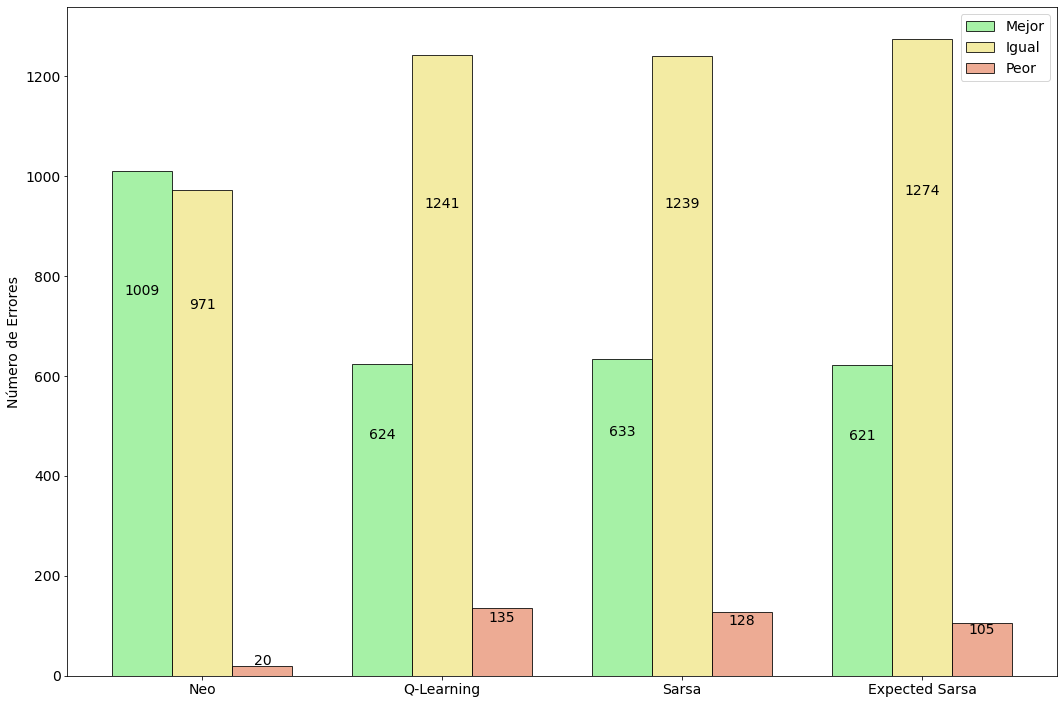

In [11]:
n_groups = 4
igual = (neo_igual, ql_igual, sarsa_igual, exsarsa_igual)
mejor = (neo_mejor, ql_mejor, sarsa_mejor, exsarsa_mejor)
peor = (neo_peor, ql_peor, sarsa_peor, exsarsa_peor)

fig, ax = plt.subplots(figsize=(15,10))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, mejor, bar_width,
alpha=opacity,
color='lightgreen',
label='Mejor',
edgecolor = 'black')



rects2 = plt.bar(index + bar_width, igual, bar_width,
alpha=opacity,
color='khaki',
label='Igual',
edgecolor = 'black')


rects3 = plt.bar(index + bar_width*2, peor, bar_width,
alpha=opacity,
color='darksalmon',
label='Peor',
edgecolor = 'black')

#plt.xlabel('Algoritmo')
plt.ylabel('Número de Errores')
#plt.title('Número de errores por Algoritmo')
plt.xticks(index + bar_width, ('Neo', 'Q-Learning', 'Sarsa', 'Expected Sarsa'))
plt.legend()
plt.tight_layout()


for i in index:
    ax.text(index[i], 
             mejor[i]*0.75,
             str(mejor[i]),
             ha='center', va='bottom',
            )
    
    ax.text(index[i] + bar_width, 
             igual[i]*0.75,
             str(igual[i]),
             ha='center', va='bottom',
            )
    
    ax.text(index[i] + 2*bar_width, 
             peor[i]*0.75,
             str(peor[i]),
             ha='center', va='bottom',
            )




plt.savefig("RL_Errores_General.pdf")

plt.show()

##### Por tipo rango de latencia

In [12]:
def split_by_latency(df_final):
    df = df_final.copy()
    df_50_70 = df[df['real_old'] < 70]
    df_70_90 = df[(df['real_old'] >= 70) & (df['real_old'] < 90)]
    df_90_110 = df[(df['real_old'] >= 90) & (df['real_old'] < 110)]
    df_110_130 = df[(df['real_old'] >= 110) & (df['real_old'] < 130)]
    df_130_150 = df[df['real_old'] >= 130]
    return df_50_70, df_70_90, df_90_110, df_110_130, df_130_150

In [13]:
def plot_errores_rango(df_final,ax,nombre_algoritmo):
    mejor = []
    peor = []
    igual = []
    splitting = split_by_latency(df_final) 
    n_groups = len(splitting)
    for df in splitting:
        m, p , i = mejor_peor_igual(df)
        mejor.append(m)
        peor.append(p)
        igual.append(i)

    index = np.arange(n_groups)
    bar_width = 0.2
    opacity = 0.8

    rects1 = ax.bar(index, mejor, bar_width,
    alpha=opacity,
    color='lightgreen',
    label='Mejor',
    edgecolor = 'black')

    
    rects2 = ax.bar(index + bar_width, igual, bar_width,
    alpha=opacity,
    color='khaki',
    label='Igual',
    edgecolor = 'black')
    
    rects3 = ax.bar(index + 2*bar_width, peor, bar_width,
    alpha=opacity,
    color='darksalmon',
    label='Peor',
    edgecolor = 'black')

    #ax.set_xlabel('Rangos de latencia')
    #ax.set_xlabel('Número de errores')
    ax.set_title(f'Número de errores de {nombre_algoritmo} por rangos de latencia')
    labels = ('[50-70)','[70-90)','[90-110)','[110-130)','[130-150]')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(labels)
    ax.legend()
    


    for i in index:
        ax.text(index[i], 
                 mejor[i]*0.75,
                 str(mejor[i]),
                 ha='center', va='bottom',
                )
        ax.text(index[i] + bar_width, 
                 igual[i]*0.75,
                 str(igual[i]),
                 ha='center', va='bottom',
                )
        ax.text(index[i] + 2*bar_width, 
                 peor[i]*0.75,
                 str(peor[i]),
                 ha='center', va='bottom',
                )
    return ax

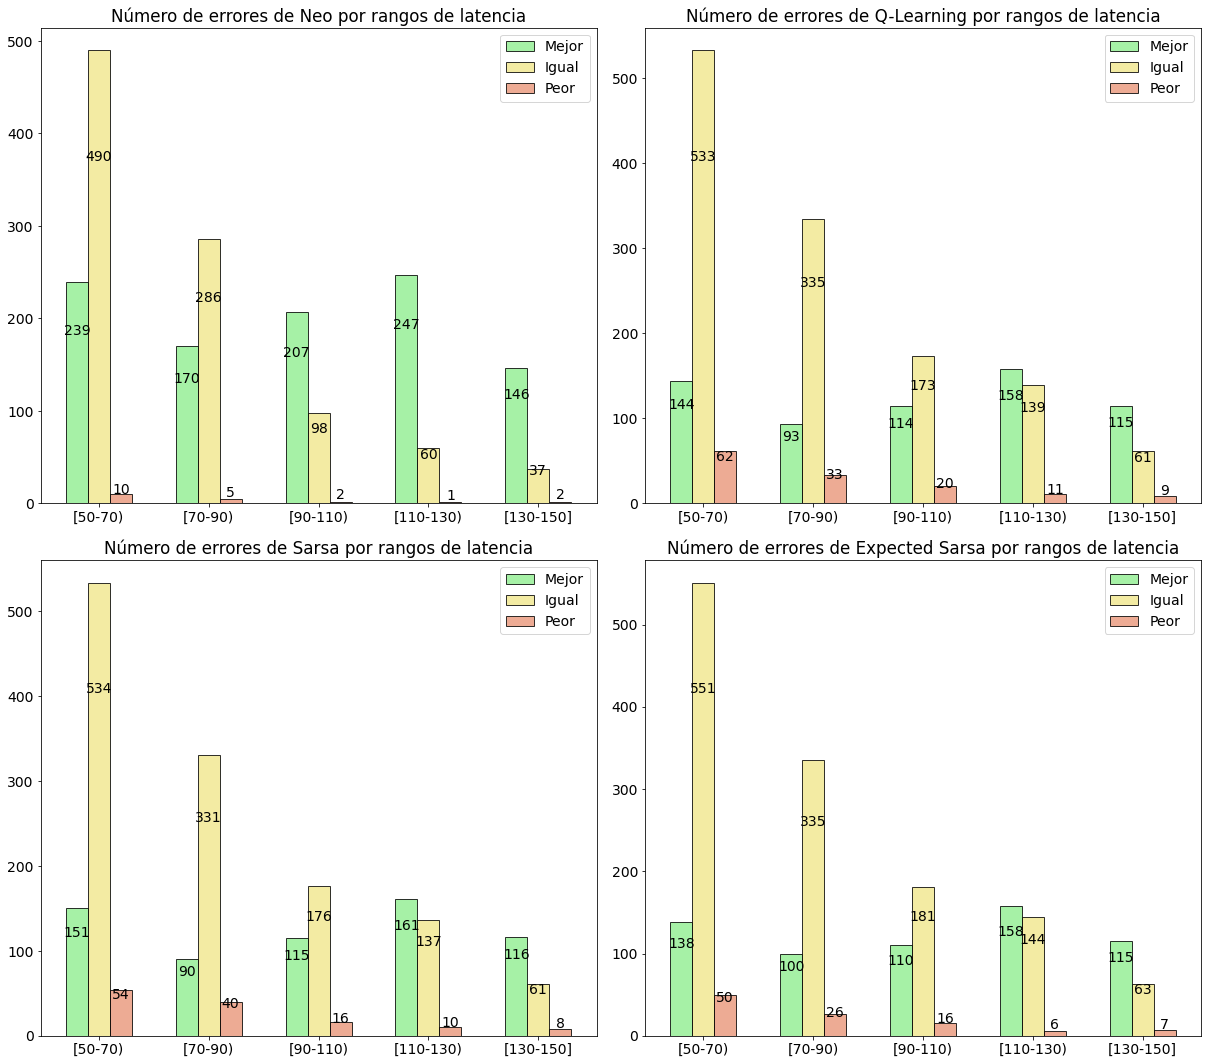

In [14]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(17,15))
ax1 = plot_errores_rango(neo_df_final, ax1, 'Neo')
ax2 = plot_errores_rango(ql_df_final, ax2, 'Q-Learning')
ax3 = plot_errores_rango(sarsa_df_final, ax3, 'Sarsa')
ax4 = plot_errores_rango(exsarsa_df_final, ax4, 'Expected Sarsa')

plt.tight_layout()
plt.savefig("RL_Errores_Latencia.pdf")
plt.show()

### Latencia promedio de cada consulta diferenciado por numero de JOINs para cada algoritmo

In [15]:
def split_by_joins(df, val):
    joins_0_p, joins_0_e =[],[]
    joins_1_p, joins_1_e =[],[]
    joins_2_p, joins_2_e =[],[]
    joins_3_p, joins_3_e =[],[]
    joins_4_p, joins_4_e =[],[]
    joins_5_p, joins_5_e =[],[]
    #<
    #>
    columns = 'tag'
    for i in range(len(df)):
        count_joins = df['new_tree'][i].count('JOIN') 
        if count_joins == 0:
            joins_0_p.append(df[val][i])
            joins_0_e.append(df['tag'][i])
        elif count_joins == 1:
            joins_1_p.append(df[val][i])
            joins_1_e.append(df['tag'][i])
        elif count_joins == 2:
            joins_2_p.append(df[val][i])
            joins_2_e.append(df['tag'][i])       
        elif count_joins == 3:
            joins_3_p.append(df[val][i])
            joins_3_e.append(df['tag'][i])       
        elif count_joins == 4:
            joins_4_p.append(df[val][i])
            joins_4_e.append(df['tag'][i])   
        elif count_joins >= 5:
            joins_5_p.append(df[val][i])
            joins_5_e.append(df['tag'][i])   
    promedio = [joins_1_p, joins_2_p, joins_3_p, joins_4_p, joins_5_p]
    errores = [joins_1_e, joins_2_e, joins_3_e, joins_4_e, joins_5_e]
    return promedio, errores, joins_0_p, joins_0_e


In [16]:
original_p_joins, original_e_joins, original_0je,  original_0jp = split_by_joins(neo_df_final, 'pred_old')
neo_p_joins, neo_e_joins, neo_0jp,  neo_0je = split_by_joins(neo_df_final,'pred_new')
ql_p_joins, ql_e_joins, ql_0jp,  ql_0je = split_by_joins(ql_df_final, 'pred_new')
sarsa_p_joins, sarsa_e_joins, sarsa_0jp,  sarsa_0je = split_by_joins(sarsa_df_final, 'pred_new')
exsarsa_p_joins, exsarsa_e_joins, exsarsa_0jp,  exsarsa_0je = split_by_joins(exsarsa_df_final, 'pred_new')

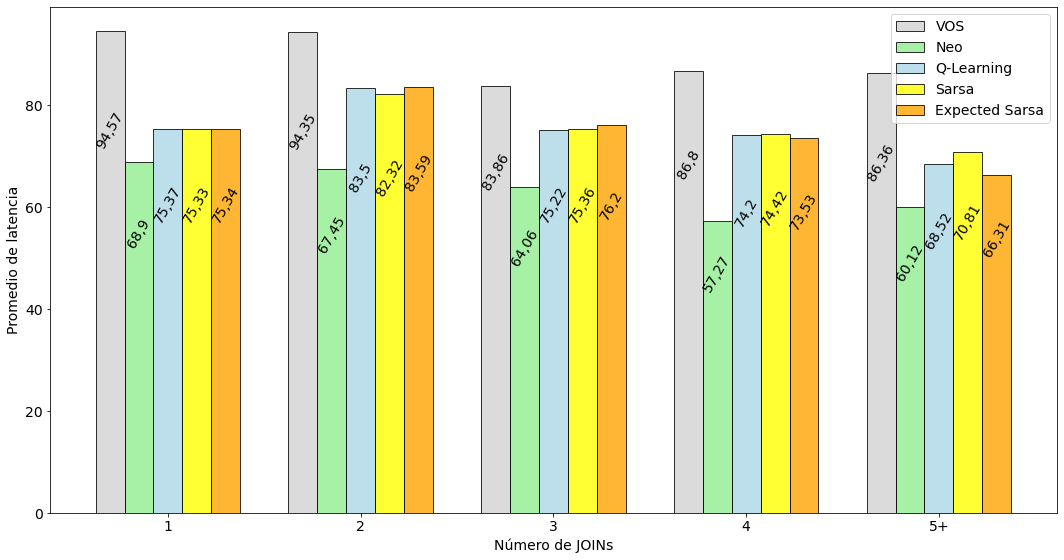

In [17]:
n_groups = len(neo_p_joins)
fig, ax = plt.subplots(figsize=(15,8))
bar_width = 0.15
index = np.arange(n_groups)
opacity = 0.8
c = ['lightgrey','lightgreen','lightblue','yellow','orange']


mean_original = np.array([np.mean(val) for val in original_p_joins])
mean_neo = np.array([np.mean(val) for val in neo_p_joins])
mean_ql = np.array([np.mean(val) for val in ql_p_joins])
mean_sarsa = np.array([np.mean(val) for val in sarsa_p_joins])
mean_exsarsa = np.array([np.mean(val) for val in exsarsa_p_joins])


rects_original = plt.bar(index, mean_original, bar_width,
alpha=opacity,
color=c[0],
edgecolor = 'black',
label='VOS')


rects_neo = plt.bar(index+bar_width, mean_neo, bar_width,
alpha=opacity,
color=c[1],
edgecolor = 'black',
label='Neo')


rects_ql = plt.bar(index+bar_width*2, mean_ql, bar_width,
alpha=opacity,
color=c[2],
edgecolor = 'black',
label='Q-Learning')


rects_sarsa = plt.bar(index+bar_width*3, mean_sarsa, bar_width,
alpha=opacity,
color=c[3],
edgecolor = 'black',
label='Sarsa')
rects_exsarsa = plt.bar(index+bar_width*4, mean_exsarsa, bar_width,
alpha=opacity,
color=c[4],
edgecolor = 'black',
label='Expected Sarsa')


plt.xlabel('Número de JOINs')
plt.ylabel('Promedio de latencia')
#plt.title(f'Latencia promedio con cierta cantidad de número de Joins para cada algoritmo')
plt.xticks(index+bar_width*2, ('1','2','3','4','5+'))
plt.legend()
plt.tight_layout()

rotation = 60
autolabel(rects_original,ax,rotation)
autolabel(rects_neo,ax,rotation)
autolabel(rects_ql,ax,rotation)
autolabel(rects_sarsa,ax,rotation)
autolabel(rects_exsarsa,ax,rotation)

plt.savefig("RL_Promedio_Joins.pdf")
plt.show()

### Consultas mejoradas, consultas iguales, consultas empeoradas diferenciados por numero de JOINs

In [18]:
def plot_errores_join(lista_e_join, ax, nombre_algoritmo):
    igual = []
    mejor = []
    peor = []
    for j in lista_e_join:
        i, m, p = j.count('igual'), j.count('mejor'), j.count('peor')
        igual.append(i)
        mejor.append(m)
        peor.append(p)
        
    n_groups = len(igual)
    
    index = np.arange(n_groups)
    bar_width = 0.25
    opacity = 0.8

    rects1 = ax.bar(index, mejor, bar_width,
    alpha=opacity,
    color='lightgreen',
    label='Mejor',
    edgecolor = 'black')

    rects2 = ax.bar(index + bar_width, igual, bar_width,
    alpha=opacity,
    color='khaki',
    label='Igual',
    edgecolor = 'black')

    rects3 = ax.bar(index + 2*bar_width, peor, bar_width,
    alpha=opacity,
    color='darksalmon',
    label='Peor',
    edgecolor = 'black')

    #ax.set_xlabel('Número de JOINS')
    #ax.set_ylabel('Promedio de latencia')
    ax.set_title(f"{nombre_algoritmo}")
    labels = ('1','2','3','4','5+')
    ax.set_xticks(index+bar_width*2)
    ax.set_xticklabels(labels)
    ax.legend()
    

    for i in index:
        ax.text(index[i], 
                 mejor[i]+0.75,
                 str(mejor[i]),
                 ha='center', va='bottom',
                )
        ax.text(index[i] + bar_width, 
                 igual[i]+0.75,
                 str(igual[i]),
                 ha='center', va='bottom',
                )
        ax.text(index[i] + 2*bar_width, 
                 peor[i]+0.75,
                 str(peor[i]),
                 ha='center', va='bottom',
                )


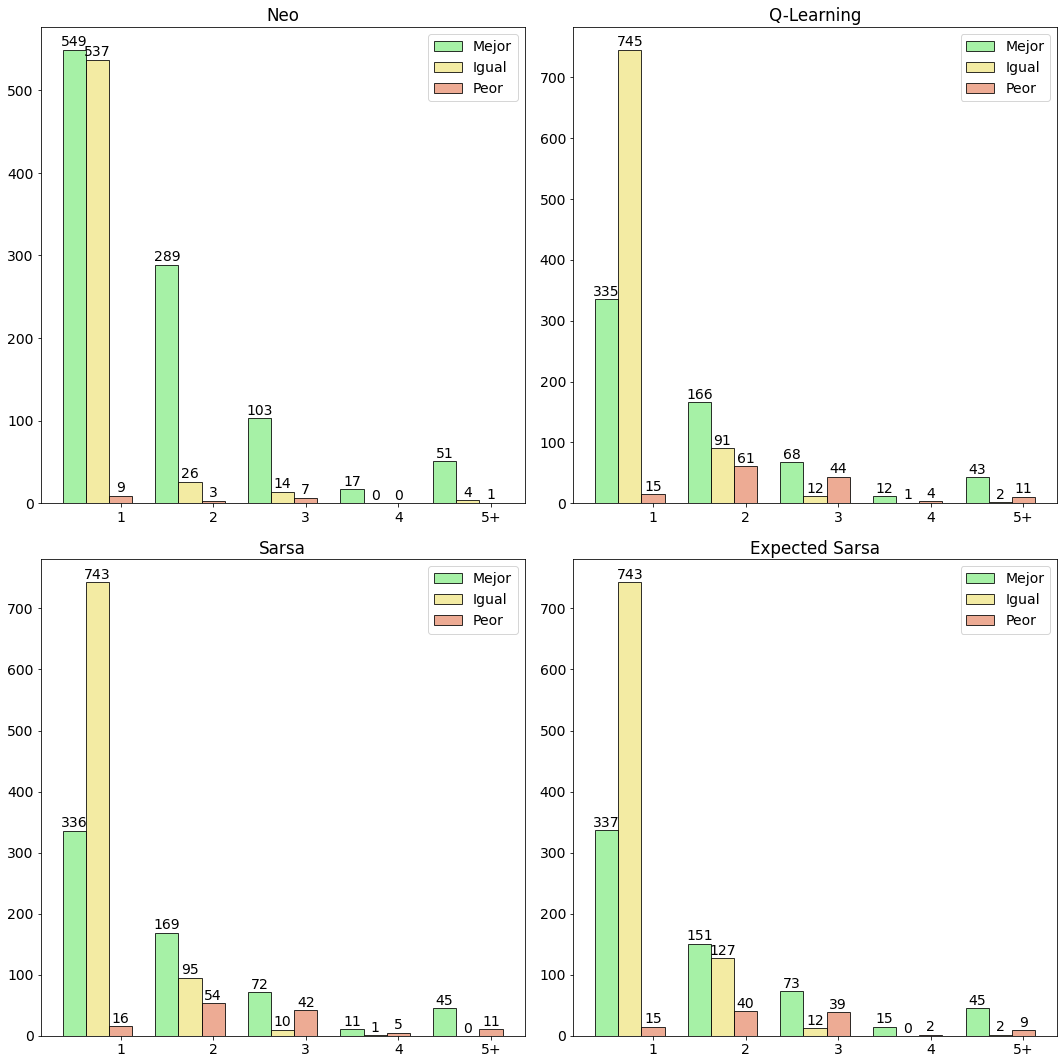

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,15))

ax1 = plot_errores_join(neo_e_joins, ax1, 'Neo')
ax2 = plot_errores_join(ql_e_joins, ax2,'Q-Learning')
ax3 = plot_errores_join(sarsa_e_joins, ax3,'Sarsa')
ax4 = plot_errores_join(exsarsa_e_joins, ax4,'Expected Sarsa')

plt.tight_layout()
plt.savefig("RL_Errores_Joins.pdf")
plt.show()

### RMSE y MAE Por iteración

In [20]:
def ValoresRealesPorIteracionFormato(df, num_iter):
    aux_dict = {}
    all_real_values = []
    old_pred_values = []
    for i in range(num_iter):
        aux_dict[str(i)] = {"index" : 0, "real" : [], "old_pred" : []}
    for i in range(len(df)):
        a = [df['index'][i],df['iteration'][i],df['real_new'][i],df['pred_old'][i]]
        aux_dict[str(a[1])]["index"] = a[0]
        aux_dict[str(a[1])]["real"].append(float(a[2]))
        aux_dict[str(a[1])]["old_pred"].append(float(a[3]))
    for k,v in aux_dict.items():
        #aux_dict[k]["mean_preds"] = np.mean(aux_dict[k]["preds"])
        #values_pred.append(np.mean(aux_dict[k]["preds"]))
        all_real_values.append(aux_dict[k]["real"])
        old_pred_values.append(aux_dict[k]["old_pred"])
    return all_real_values, old_pred_values

def MetricasListas(pred_values_por_iter,real_values_por_iter):
    mseval_list = []
    maeval_list = []
    rmseval_list = []
    for val,rl in zip(pred_values_por_iter,real_values_por_iter):
        mse = mean_squared_error(val, rl)
        mae = mean_absolute_error(val, rl)
        mseval_list.append(mse)
        maeval_list.append(mae)
        rmseval_list.append(np.sqrt(mse))
    return mseval_list, maeval_list, rmseval_list

In [21]:
all_real_values, old_pred_values = ValoresRealesPorIteracionFormato(model_final_iter[1],200)

In [22]:
mse_old_pred, mae_old_pred, rmse_old_pred = MetricasListas(old_pred_values, all_values_pred_neo)
mse_neo, mae_neo, rmse_neo = MetricasListas(all_real_values, all_values_pred_neo)
mse_ql, mae_ql, rmse_ql = MetricasListas(all_real_values, all_values_pred_ql)
mse_sarsa, mae_sarsa, rmse_sarsa = MetricasListas(all_real_values, all_values_pred_sarsa)
mse_exsarsa, mae_exsarsa, rmse_exsarsa = MetricasListas(all_real_values, all_values_pred_exsarsa)

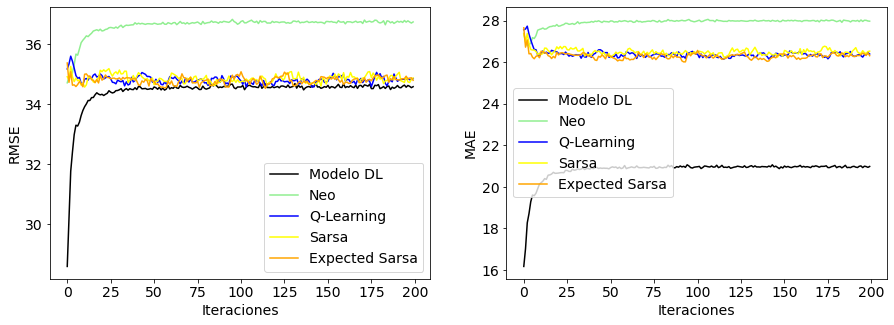

In [23]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))
width = 0.15
ind = np.arange(len(mse_neo))
c = ['lightgreen','lightblue','yellow','orange']
names = ('Neo','Q-Learning','Sarsa','Expected Sarsa')

ax1.plot(ind, rmse_old_pred, color="black", label = "Modelo DL")
ax1.plot(ind, rmse_neo, color=c[0], label = names[0])
ax1.plot(ind, rmse_ql, color="blue", label = names[1])
ax1.plot(ind, rmse_sarsa, color=c[2], label = names[2])
ax1.plot(ind, rmse_exsarsa, color=c[3], label = names[3])
ax1.set_ylabel('RMSE')
ax1.set_xlabel('Iteraciones')
ax1.legend()

ax2.plot(ind, mae_old_pred, color="black", label = "Modelo DL")
ax2.plot(ind, mae_neo, color=c[0], label = names[0])
ax2.plot(ind, mae_ql, color="blue", label = names[1])
ax2.plot(ind, mae_sarsa, color=c[2], label = names[2])
ax2.plot(ind, mae_exsarsa, color=c[3], label = names[3])
ax2.set_ylabel('MAE')
ax2.set_xlabel('Iteraciones')
ax2.legend()